# Importing the dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [4]:
data=pd.read_csv("C:\\Users\\Rakesh\\Downloads\\water_potability.csv")

FEATURE DESCRIPTION:

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# Creating Dataframe

In [5]:
df=pd.DataFrame(data)

# Exploring Data

In [6]:
df.shape

(3276, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Handling the missing values

In [10]:
df.fillna(data.mean(),inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Skewness

In [12]:
#Skewness
df.drop('Potability', axis=1).skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
dtype: float64

In [13]:
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [14]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Box Plot for Outliers

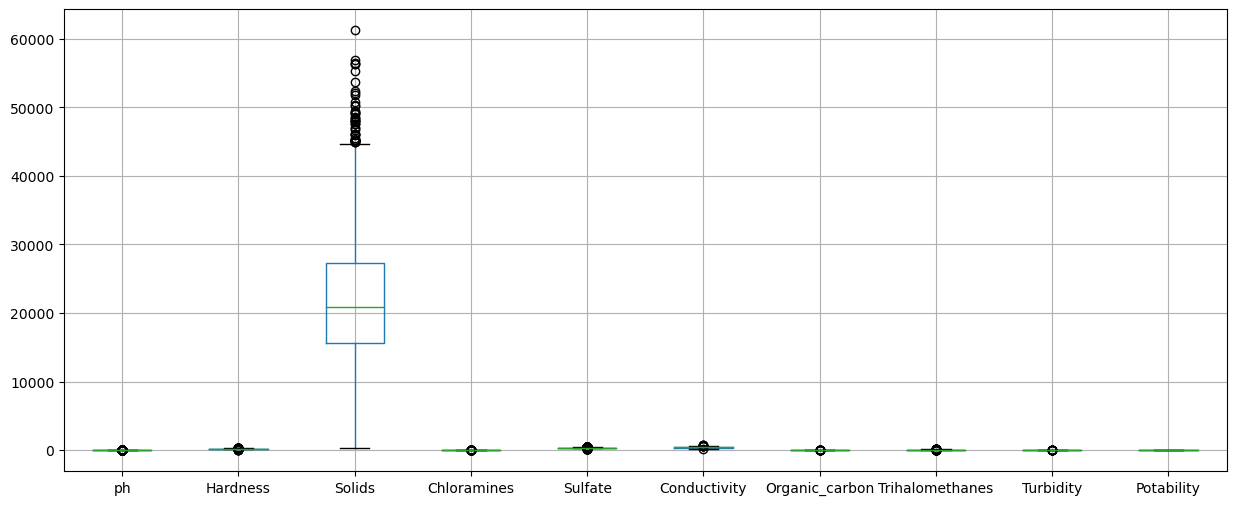

In [15]:
#checking the outlier using Box plot
df.boxplot(figsize=(15,6))
plt.show()


In [16]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [17]:
df['Solids']  # not removing ouotliers , it can help later

0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3276, dtype: float64

In [18]:
df.shape

(3276, 10)

In [19]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [20]:
# Count plot for potability
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=data, palette='husl');

# Univariate Analysis - Histograms

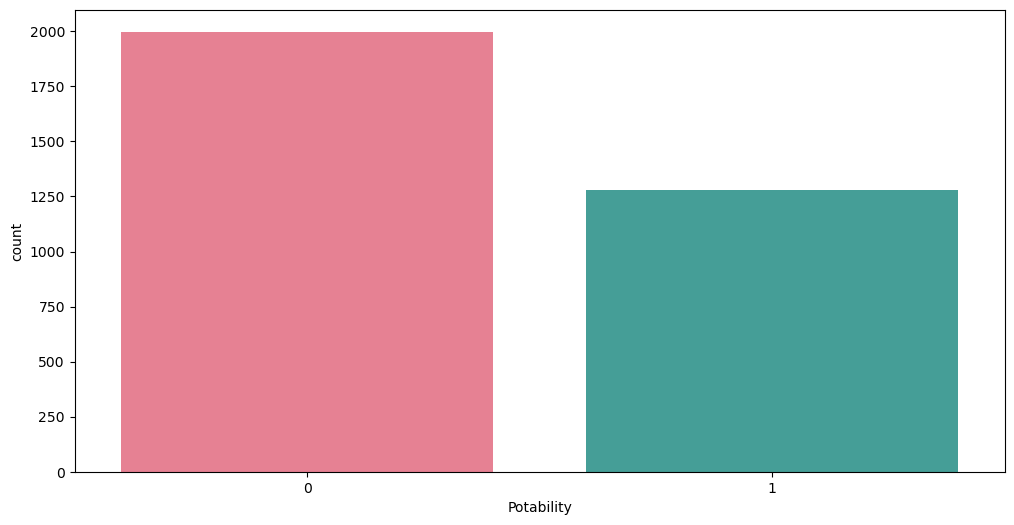

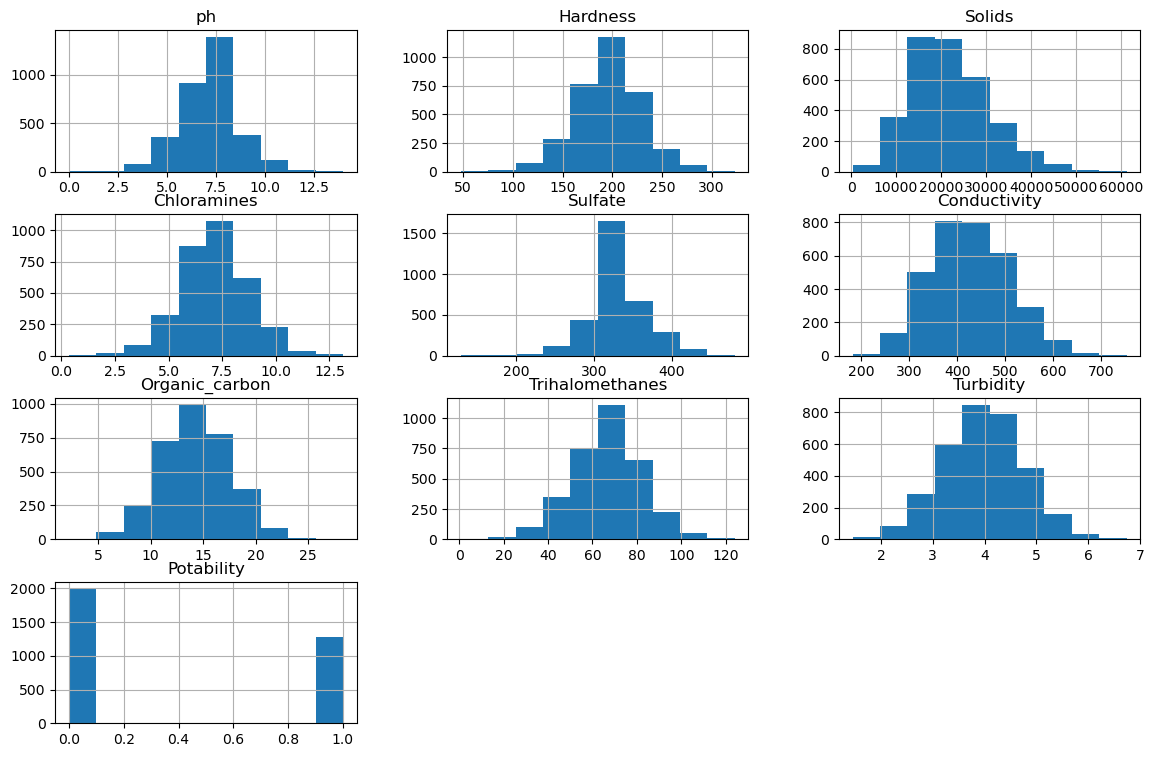

In [21]:
# Univariate Analysis
# Histogram plots
df.hist(figsize=(14,9))
plt.show()

# Bivariate Analysis - Correlation

In [22]:
# Bivariate Analysis
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


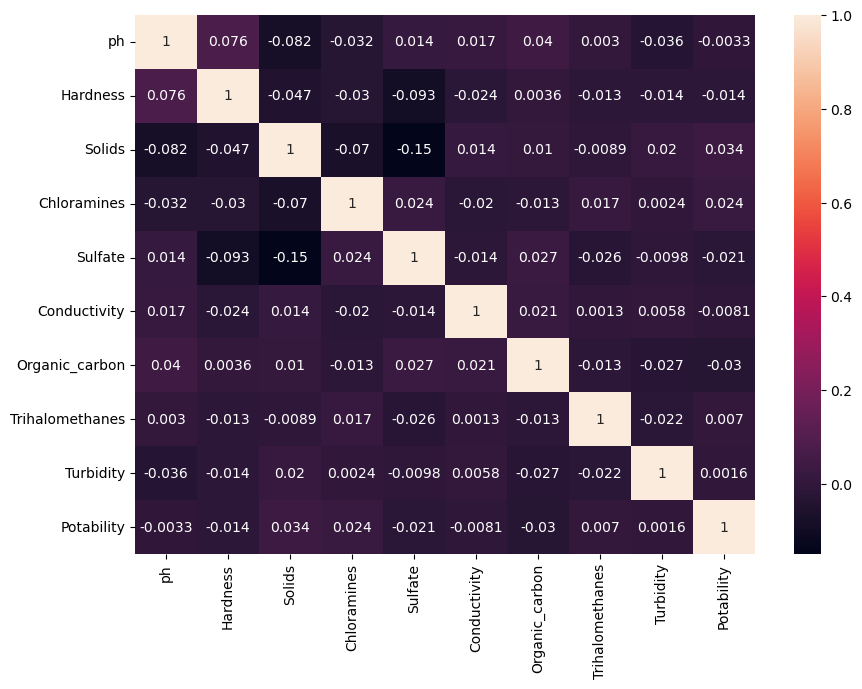

In [23]:
#Correlation Plot
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

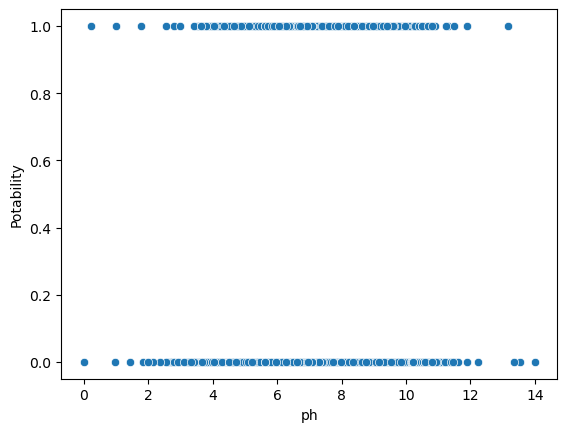

In [24]:
# Scatter Plot
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()

# Model Training

In [25]:
#Model Training
#Partitioning
x=df.drop('Potability',axis=1) #Input Data
y=df['Potability'] #Target variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=2)


In [26]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2218,5.574756,189.700665,11512.465842,8.720972,329.939631,331.330352,18.016991,66.188642,4.371806
1626,6.505066,226.419609,16982.131974,6.938467,318.245710,484.092285,18.527105,80.462810,2.890999
2701,7.822257,200.002793,22411.006864,5.283594,343.080377,593.483602,12.273073,75.256212,3.080866
914,5.791154,190.431679,20288.235569,6.298366,347.041020,544.857481,17.706838,84.388191,4.104835
2362,7.859490,211.311029,31725.487766,7.519691,313.344198,433.444665,15.909471,66.396293,4.498069
...,...,...,...,...,...,...,...,...,...
1811,7.080795,247.164018,18939.616461,7.086375,305.040026,419.453088,12.758114,60.319203,4.287441
1123,5.803497,193.200991,19451.767603,4.146601,255.976746,365.477618,14.920616,8.577013,2.181714
515,5.701155,233.515043,41411.601707,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
655,6.604008,212.978467,23564.579663,6.608205,325.353860,430.332754,14.352905,33.403048,4.458967


In [27]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3216,5.609235,216.122673,14825.934502,7.001788,355.211678,330.092674,9.779518,41.249977,3.224676
3050,8.479593,200.765679,14901.808144,7.379506,333.775777,485.093167,16.806347,53.134170,4.221266
739,6.772157,196.900098,13790.296202,9.575053,333.775777,347.588375,17.705727,68.379815,3.827256
2100,4.894278,184.552715,10922.541994,7.461703,352.830222,338.681069,21.624718,91.007934,3.594991
2035,5.763773,183.073629,22025.696606,8.952896,333.775777,376.581389,10.547398,63.299757,3.253200
...,...,...,...,...,...,...,...,...,...
2347,5.429335,183.439383,15265.407564,5.714731,394.001195,446.879149,17.581557,50.266951,3.081736
1608,6.919726,194.859000,35558.731647,6.371978,299.786711,394.829326,11.983961,69.853135,4.120828
2541,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2575,6.914868,206.249937,10343.378848,7.771206,324.383170,521.320673,16.173730,68.246945,2.988611


In [28]:
x_test.shape

(656, 9)

In [29]:
y_test.shape

(656,)

# Random Forest Model

In [30]:
#Random Forest 
#creating model object
model_rf=RandomForestClassifier()
    

In [31]:
#training model RF
model_rf.fit(x_train,y_train)

RandomForestClassifier()

# Prediction and Accuracy

In [32]:
#Making Prediction
pred_rf=model_rf.predict(x_test)

In [33]:
accuracy_score_rf=accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

67.98780487804879

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Calculating metrics
accuracy_score_rf = accuracy_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)

In [36]:
print(f"Accuracy: {accuracy_score_rf*100:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Accuracy: 67.99%
Precision: 0.61
Recall: 0.37
F1 Score: 0.46


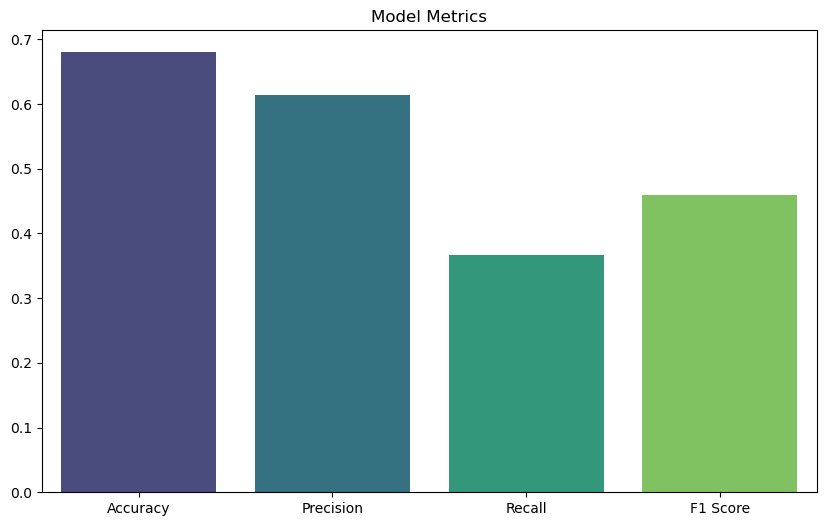

In [37]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_score_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Metrics')
plt.show()